<a href="https://colab.research.google.com/github/lomovtsevp/diploma-real-time-emotions-recognition/blob/main/DIPLOMA_FACE_EMOTIONS_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('https://vk.com/doc296252774_642074062?hash=A3aJ1VR9OcGBKOFapo123ffzfloYe21LVXF8boAthaX&dl=rrU3s3ecgEGkqHVs4zU2kE0epy4TZLY8CEpIT8LxiLs')

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
CLASS_LABELS  = ['Злость', 'Отвращение', 'Страх/Ужас', 'Счастье', 'Нейтральное', 'Грусть', "Удивление"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="sunset") 
fig.update_xaxes(title="Эмоция")
fig.update_yaxes(title = "Количество фото в выборке")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Распределение тренировочных данных',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
data = data.sample(frac=1)
labels = to_categorical(data[['emotion']], num_classes=7)

In [ ]:
train_pixels = data["pixels"].astype(str).str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)

In [ ]:
pixels = train_pixels.reshape((35887*2304,1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)

In [ ]:
pixels = train_pixels.reshape((35887, 48, 48,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(25927, 48, 48, 1)
(5384, 48, 48, 1)
(4576, 48, 48, 1)


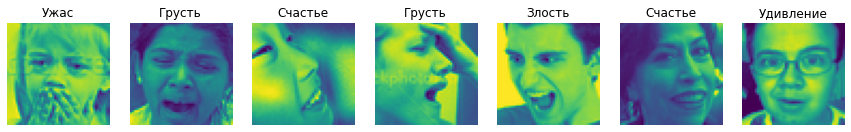

In [ ]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Злость', 1 : 'Отвращение', 2 : 'Ужас', 3 : 'Счастье', 4 : 'Грусть', 5 : 'Удивление', 6 : 'Нейтральное'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



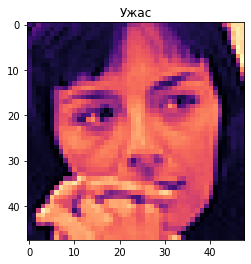

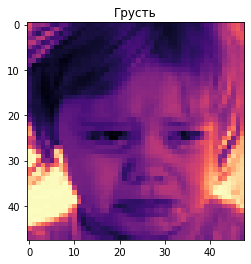

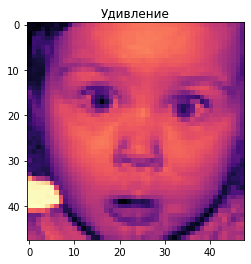

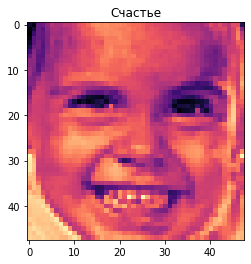

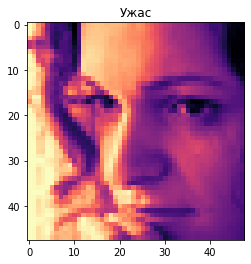

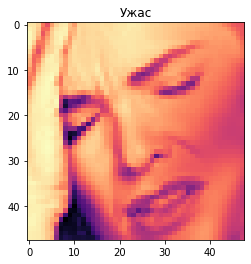

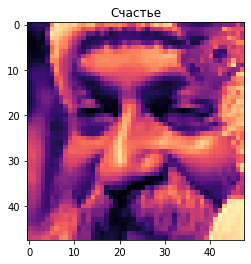

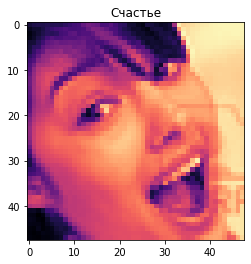

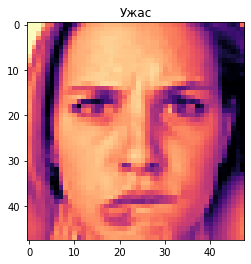

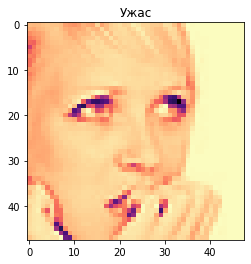

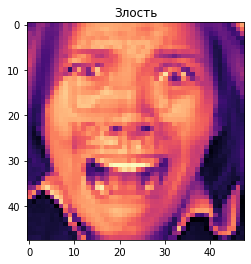

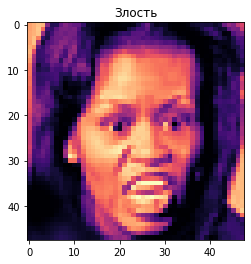

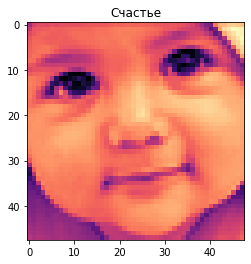

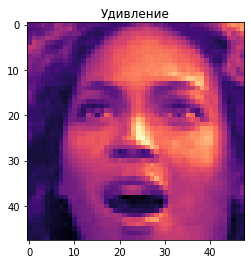

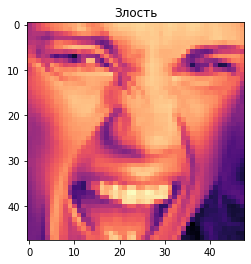

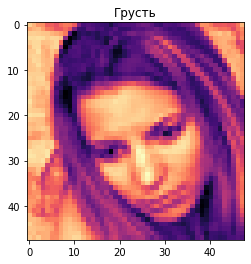

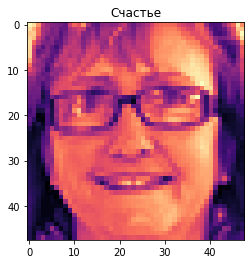

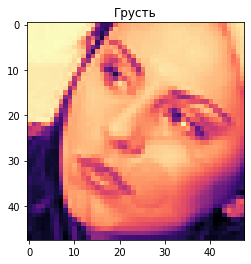

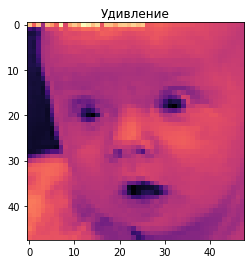

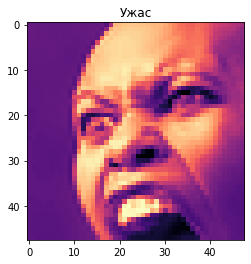

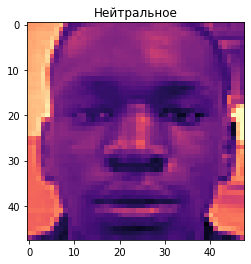

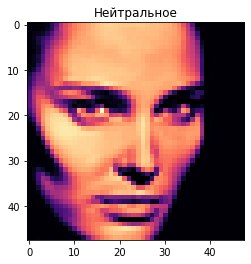

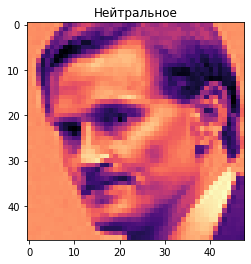

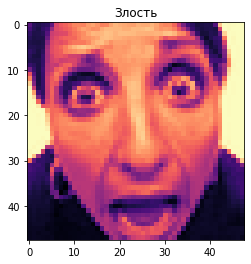

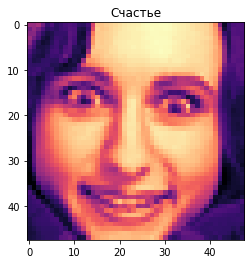

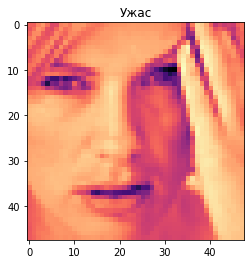

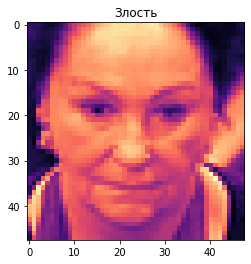

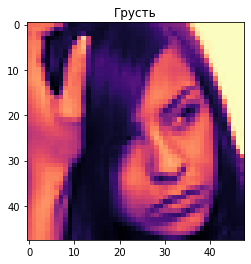

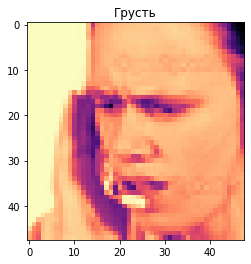

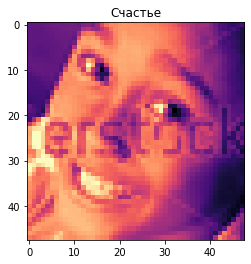

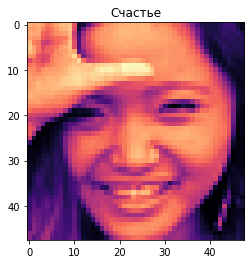

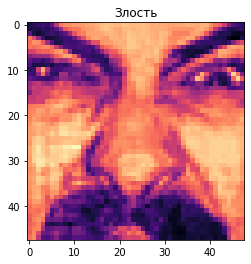

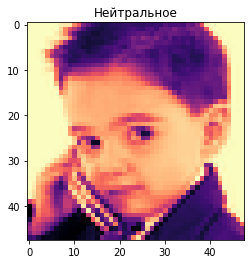

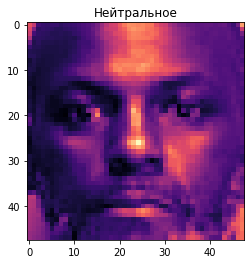

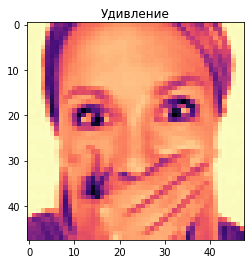

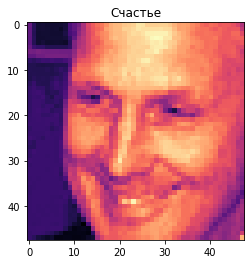

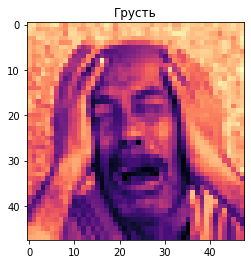

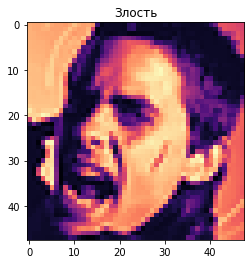

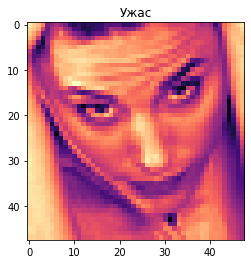

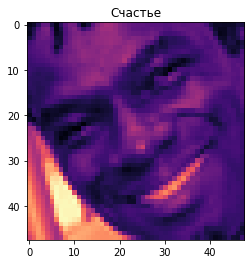

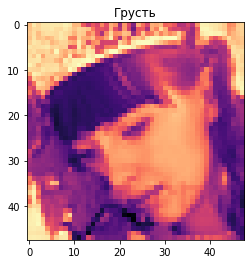

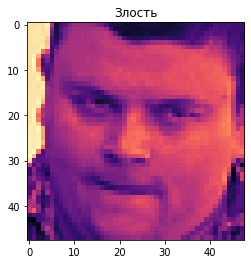

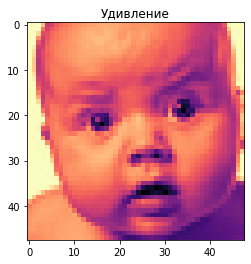

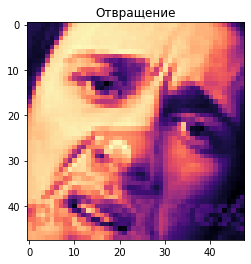

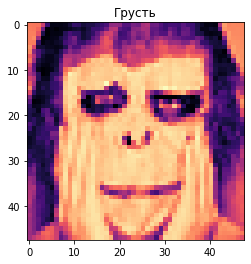

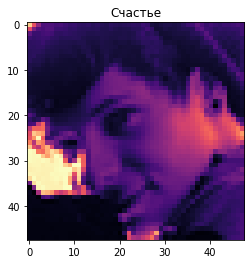

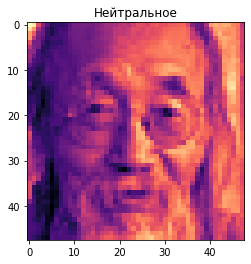

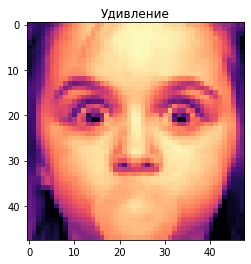

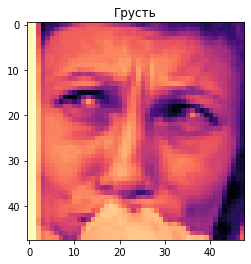

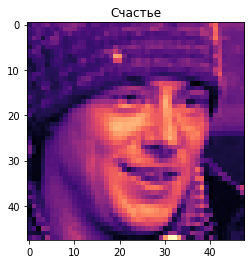

In [ ]:
for i in range(100, 150):
  plt.figure()
  plt.imshow(np.squeeze(X_train[i]), cmap='magma')
  plt.title((label_dict[np.argmax(y_train[i])]))